# Programming Exercise 7: K-means Clustering and Principal Component Analysis
## Machine Learning
### Introduction
In this exercise, you will implement the K-means clustering algorithm and apply it to compress an image. In the second part, you will use principal component analysis to find a low-dimensional representation of face images. 
Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

### Files included in this exercise
* `ex7.ipynb` - Python script that steps you through the exercise. 
* `ex7_utils.py` - All necessary functions, classes and solutions for the exercises.
* `ex7_data/data1_mat` - Example Dataset for PCA.
* `ex7_data/data2.mat` - Example Dataset for K-means.
* `ex7_data/ex7faces.mat` - Faces Dataset.
* `bird_small.png` - Example Image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ex7_utils import *
import scipy.io as io
from IPython.display import *

# Setup environment variables

%load_ext autoreload
%autoreload 2
%matplotlib inline

## 1 K-means Clustering
In this this exercise, you will implement the $K$-means algorithm and use it for image compression. You will first start on an example 2D dataset that will help you gain an intuition of how the $K$-means algorithm works. After that, you wil use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

### 1.1 Implementing K-means

The $K$-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set $\{x^{(1)} , ..., x^{(m)} \}$ (where $x^{(i)} \in \mathbb{R}^n$), and want to group the data into a few cohesive "clusters". The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

The inner-loop of the algorithm repeatedly carries out two steps: (i) Assigning each training example $x^{(i)}$ to its closest centroid, and (ii) Recomputing the mean of each centroid using the points assigned to it. The $K$-means algorithm will always converge to some final set of means for the centroids. Note that the converged solution may not always be ideal and depends on the initial setting of the centroids. Therefore, in practice the $K$-means algorithm is usually run a few times with different random initializations. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

You will implement the two phases of the $K$-means algorithm separately in the next sections.

#### 1.1.1 Finding closest centroids

In the "cluster assignment" phase of the $K$-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. Specifically, for every example $i$ we set 

$$
\left. \begin{array}{lcr}
c^{(i)} := j & \text{that minimizes} & {\Vert x^{(i)} - \mu_j \Vert}^2 ,
\end{array} \right.
$$

where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ , and $\mu_j$ is the position (value) of the $j$'th centroid. Note that $c^{(i)}$ corresponds to idx(i) in the starter code.

Your task is to complete the code in <b>find_closest_centroids</b>. This function takes the data matrix $X$ and the locations of all centroids inside centroids and should output a one-dimensional array idx that holds the index (a value in $\{1, ..., K\}$, where $K$ is total number of centroids) of the closest centroid to every training example.

You can implement this using a loop over every training example and every centroid.

Once you have completed the code in <b>find_closest_centroids</b>, the script will run your code and you should see the output  corresponding to the centroid assignments for the first 3 examples.

In [2]:
#  ================= Part 1: Find Closest Centroids ====================
#  To help you implement K-Means, we have divided the learning algorithm into two functions -- find_closest_centroids
# and computeCentroids. In this part, you should complete the code in the find_closest_centroids function. 
print('Finding closest centroids.')

# Load an example dataset that we will be using
data = io.loadmat('ex7_data/ex7data2.mat')
X = data['X']

# Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the initial_centroids
idx = find_closest_centroids(X, initial_centroids)
print('Closest centroids for the first 3 examples: %i, %i, %i' %tuple(idx[:3]))
print('(the closest centroids should be 1, 3, 2 respectively)')

Finding closest centroids.
Closest centroids for the first 3 examples: 1, 3, 2
(the closest centroids should be 1, 3, 2 respectively)


#### 1.1.2 Computing centroid means
Given assignments of every point to a centroid, the second phase of thealgorithm recomputes, for each centroid, the mean of the  points that were assigned to it. Specifically, for every centroid $k$ we set

$$
\large{ \mu_k := \frac{1}{|C_k|}\sum_{i \in{C_k}}{x^{(i)}}}
$$

where $C_k$ is the set of examples that are assigned to centroid $k$. Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k = 2$, then you should update $\mu_2 = \frac{1}{2}(x^{(3)} + x^{(5)})$.

You should now complete the code in <b>compute_centroids</b>. You can implement this function using a loop over the centroids. You can also use a loop over the examples; but if you can use a vectorized implementation that does not use such a loop, your code may run faster.

In [3]:
#  ===================== Part 2: Compute Means =========================
#  After implementing the closest centroids function, you should now
#  complete the computeCentroids function.

print('Computing centroids means.\n\n')


#  Compute means based on the closest centroids found in the previous part.
centroids = compute_centroids(X, idx, K)
print('Centroids computed after initial finding of closest centroids: ')
print(centroids)
print('(the centroids should be)')
print('[ 2.428301 3.157924 ]\n[ 5.813503 2.633656 ]\n[ 7.119387 3.616684 ]\n')

Computing centroids means.


Centroids computed after initial finding of closest centroids: 
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
(the centroids should be)
[ 2.428301 3.157924 ]
[ 5.813503 2.633656 ]
[ 7.119387 3.616684 ]



### 1.2 K-means on example dataset

<img src="figure1.png" height="40%" width="40%">

After you have completed the two functions (find_closest_centroids and compute_centroids), the next step will run the K-means algorithm on a toy 2D dataset to help you understand how $K$-means works. Notice that the code calls the two functions you implemented in a loop.

When you run the next step, the $K$-means code will produce a visualization that steps you through the progress of the algorithm at each iteration. At the end, your figure should look as the one displayed in <b>Figure 1</b>.

Running K-Means clustering on example dataset.




<IPython.core.display.Javascript object>


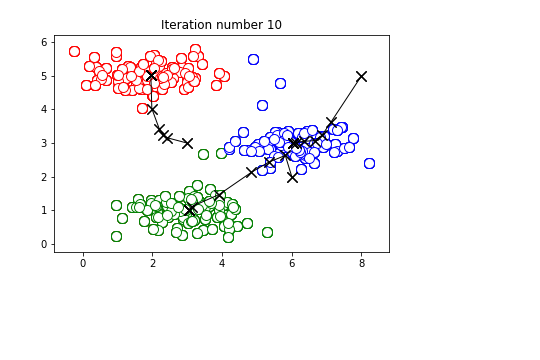

K-Means iteration 1 / 10...
K-Means iteration 2 / 10...
K-Means iteration 3 / 10...
K-Means iteration 4 / 10...
K-Means iteration 5 / 10...
K-Means iteration 6 / 10...
K-Means iteration 7 / 10...
K-Means iteration 8 / 10...
K-Means iteration 9 / 10...
K-Means iteration 10 / 10...


In [4]:
# =================== Part 3: K-Means Clustering ======================
# In this part, you will run the K-Means algorithm on the example dataset we have provided. 

print('Running K-Means clustering on example dataset.\n\n')
# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific valuesbut in practice you want to 
# generate them automatically, such as by settings them to be random examples 
# (as can be seen in `k_means_init_centroids`).

initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
# Run K-Means algorithm. 
%matplotlib notebook
fig, ax = plt.subplots()
centroids, idx = run_Kmeans(X, initial_centroids, max_iters, True, fig, ax)

%matplotlib inline

### 1.3 Random initialization

The initial assignments of centroids for the example dataset in dafault were designed so that you will see the same figure as in <b>Figure 1</b>. In practice, a good strategy for initializing the centroids is to select random examples from the training set.

In this part of the exercise, you should complete the function <b>Kmeans_init_centroids</b> with the following code:
```python
    centroids = np.zeros((K, X.shape[1]))
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[0:K], :]
```
The code above first randomly permutes the indices of the examples (using `np.random.permutation`). Then, it selects the first $K$ examples based on the random permutation of the indices. This allows the examples to be selected at random without the risk of selecting the same example twice.

### 1.4 Image compression with K-means
<img src="figure2.png" height="50%" width="50%">

In this exercise, you will apply $K$-means to image compression. In a straightforward $24$-bit color representation of an image, 2 each pixel is represented as three $8$-bit unsigned integers (ranging from $0$ to $255$) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding. Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to $16$ colors.

By making this reduction, it is possible to represent (compress) the photo in an efficient way. Specifically, you only need to store the RGB values of the $16$ selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only $4$ bits are necessary to represent $16$ possibilities).

In this exercise, you will use the $K$-means algorithm to select the $16$ colors that will be used to represent the compressed image. Concretely, you will treat every pixel in the original image as a data example and use the $K$-means algorithm to find the $16$ colors that best group (cluster) the pixels in the 3-dimensional RGB space. Once you have computed the cluster centroids on the image, you will then use the $16$ colors to replace the pixels in the original image.

#### 1.4.1 K-means on pixels

The code below first loads the image, and then reshapes it to create an $m \times 3$ matrix of pixel colors (where $m = 16384 = 128 \times 128$), and calls your $K$-means function on it.
After finding the top $K = 16$ colors to represent the image, you can now assign each pixel position to its closest centroid using the <b>find_closest_centroids</b> function. This allows you to represent the original image using the centroid assignments of each pixel. Notice that you have significantly reduced the number of bits that are required to describe the image. The original image required $24$ bits for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393$, $216$ bits. The new representation requires some overhead storage in form of a dictionary of $16$ colors, each of which require $24$ bits, but the image itself then only requires $4$ bits per pixel location. The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65$, $920$ bits, which corresponds to compressing the original image by about a factor of $6$.

<b>Figure 3: Original and reconstructed image (when using $K$-mean to compress the image).</b>
<img src="figure3_new.png" height="60%" width="60%">

Finally, you can view the effects of the compression by reconstructing the image based only on the centroid assignments. Specifically, you can replace each pixel location with the mean of the centroid assigned to it. <b>Figure 3</b> shows the reconstruction we obtained. Even though the resulting image retains most of the characteristics of the original, we also see some compression artifacts.

In [5]:
# ============= Part 4: K-Means Clustering on Pixels ===============
# In this exercise, you will use K-Means to compress an image. To do this, you will first run K-Means
# on the colors of the pixels in the image and then you will map each pixel onto its closest centroid.
print('Running K-Means clustering on pixels from an image.\n\n')

# Load an image of a bird (all values are in the range(0, 1))
A = plt.imread('bird_small.png')

# Size of the image
img_size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels. Each row will contain the Red, Green
# and B pixel values. This gives us our dataset matrix X that we will use K-Means on.
X = np.reshape(A, (img_size[0]*img_size[1],3), order='F')

# Run your K-Means algorithm on this data. You should try different values of K and max_iters here:
K = 16;
max_iters = 10

# When using K-Means, it is important the initialize the centroids randomly. 
initial_centroids = Kmeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_Kmeans(X, initial_centroids, max_iters, display=False)

Running K-Means clustering on pixels from an image.


K-Means iteration 1 / 10...
K-Means iteration 2 / 10...
K-Means iteration 3 / 10...
K-Means iteration 4 / 10...
K-Means iteration 5 / 10...
K-Means iteration 6 / 10...
K-Means iteration 7 / 10...
K-Means iteration 8 / 10...
K-Means iteration 9 / 10...
K-Means iteration 10 / 10...


Applying K-Means to compress an image.




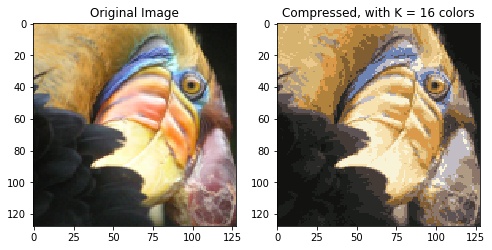

In [6]:
%matplotlib inline
# ================= Part 5: Image Compression ======================
# In this part of the exercise, you will use the clusters of K-Means to compress an image. 
# To do this, we first find the closest clusters for each example. 
print('Applying K-Means to compress an image.\n\n')
# Find closest cluster members
idx = find_closest_centroids(X, centroids)

# Essentially, now we have represented the image X as in terms of the indices in idx. We can now recover 
# the image from the indices (idx) by mapping each pixel (specified by its index in idx) to the centroid value
X_recovered = np.zeros((X.shape))

# Reshape the recovered image into proper dimensions
for i in  range(len(idx)):
    X_recovered[i,:] = centroids[int(idx[i])-1,:]
X_img = np.reshape(X_recovered, (img_size[0], img_size[1], 3), order='F')

fig=plt.figure(figsize=(8, 8))
# Display the original image 
fig.add_subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original Image')

# Display compressed image side by side
fig.add_subplot(1,2,2)
plt.imshow(X_img)
plt.title('Compressed, with K = %i colors' %K)
plt.show()


#### 1.5 Optional (ungraded) exercise: Use your own image
In this exercise, modify the code we have supplied to run on one of your own images. Note that if your image is very large, then $K$-means can take a long time to run. Therefore, we recommend that you resize your images to managable sizes before running the code. You can also try to vary $K$ to see the effects on the compression.

Running K-Means clustering on pixels from an image.
K-Means iteration 1 / 3...
K-Means iteration 2 / 3...
K-Means iteration 3 / 3...

Applying K-Means to compress an image.


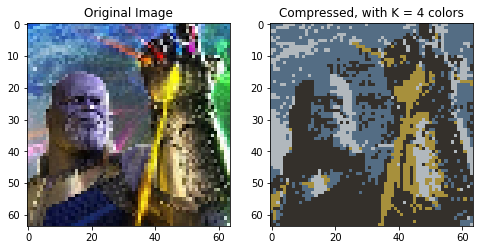

In [7]:
print('Running K-Means clustering on pixels from an image.')
img = plt.imread('thanos.png')
img_size = img.shape #(64,64,3)

X = np.reshape(img, (img_size[0]*img_size[1],3), order='F')
K = 4;
max_iters = 3
#Init centroids
initial_centroids = Kmeans_init_centroids(X, K)
# Run K-Means
centroids, idx = run_Kmeans(X, initial_centroids, max_iters, display=False)

print('\nApplying K-Means to compress an image.')
idx = find_closest_centroids(X, centroids)
X_recovered = np.zeros((X.shape))

# Reshape the recovered image into proper dimensions
for i in  range(len(idx)):
    X_recovered[i,:] = centroids[int(idx[i])-1,:]
X_img = np.reshape(X_recovered, (img_size[0], img_size[1], 3), order='F')

fig=plt.figure(figsize=(8, 8))
# Display the original image 
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

# Display compressed image side by side
fig.add_subplot(1,2,2)
plt.imshow(X_img)
plt.title('Compressed, with K = %i colors' %K)
plt.show()

## 2 Principal Component Analysis
In this exercise, you will use principal component analysis (PCA) to perform dimensionality reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of $5000$ face image dataset.
The provided script will help you step through the first half of the exercise.

### 2.1 Example Dataset
To help you understand how PCA works, you will first start with a 2D dataset which has one direction of large variation and one of smaller variation. The script will plot the training data (<b>Figure 4</b>). In this part of the exercise, you will visualize what happens when you use PCA to reduce the data from 2D to 1D. In practice, you might want to reduce data from $256$ to $50$ dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.
<img src="figure4.png" height="40%" width="40%">

Visualizing example dataset for PCA.


[0.5, 6.5, 2, 8]

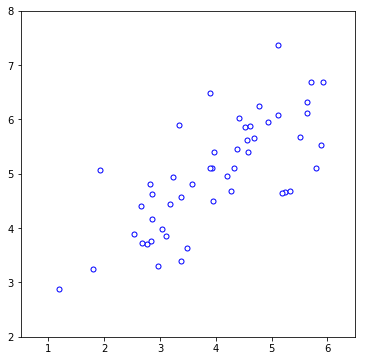

In [8]:
#  ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easily to visualize
print('Visualizing example dataset for PCA.')
#  The following command loads the dataset. 

data = io.loadmat('ex7_data/ex7data1.mat')
X = data['X']
#  Visualize the example dataset
plt.figure(figsize=(6,6))
plt.plot(X[:,0], X[:,1], 'bo', mfc='w', ms=5)
plt.axis([0.5, 6.5, 2, 8])

### 2.2 Implementing PCA

In this part of the exercise, you will implement PCA. PCA consists of two computational steps: First, you compute the covariance matrix of the data. Then, you use `np.linalg.svd` function to compute the eigenvectors $U_1, U_2, ... , U_n$ . These will correspond to the principal components of variation in the data.

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range. In the provided script, this normalization has been performed for you using the <b>feature_normalize</b> function.

After normalizing the data, you can run PCA to compute the principal components. You task is to complete the code in <b>pca</b> function to compute the principal components of the dataset. First, you should compute the covariance matrix of the data, which is given by:

$$
\sum = \frac{1}{m}{X^T X}
$$

where $X$ is the data matrix with examples in rows, and $m$ is the number of examples. Note that $\sum$ is a $n \times n$ matrix and not the summation operator.

After computing the covariance matrix, you can run SVD on it to compute the principal components. Once you have completed `pca`, the script will run PCA on the example dataset and plot the corresponding principal components found (<b>Figure 5</b>). The script will also output the top principal component (eigen-vector) found, and you should expect to see an output of about $[-0.707 -0.707]$.

<img src="figure5.png" height="40%" width="40%">

Running PCA on example dataset.


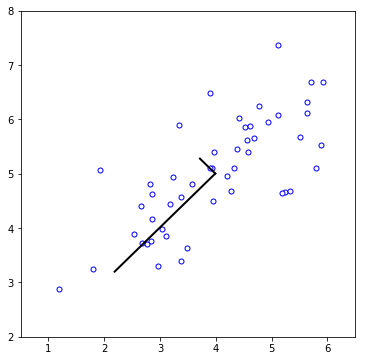

Top eigenvector: 
 U[:,0] = -0.707107 -0.707107 

(you should expect to see -0.707107 -0.707107)



In [9]:
#  =============== Part 2: Principal Component Analysis ===============
#  You should now implement PCA, a dimension reduction technique. You
#  should complete the code in pca.m

print('Running PCA on example dataset.')

#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = feature_normalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
plt.figure(figsize=(6,6))
plt.plot(X[:,0], X[:,1], 'bo', mfc='w', ms=5)
plt.axis([0.5, 6.5, 2, 8])

a1 = mu + 1.5 * S[0, 0] * U[:,0].T
a2 = mu + 1.5 * S[1, 1] * U[:,1].T
plt.plot([mu[0,0], a1[0,0]],[mu[0, 1], a1[0,1]], '-', c='k', lw=2)
plt.plot([mu[0,0], a2[0,0]],[mu[0, 1], a2[0,1]], '-', c='k', lw=2)
plt.show()

print('Top eigenvector: ')
print(' U[:,0] = %f %f \n' %tuple(U[:,0]))
print('(you should expect to see -0.707107 -0.707107)\n')

### 2.3 Dimensionality Reduction with PCA
After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, $x^{(i)} \to z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part of the exercise, you will use the eigenvectors returned by PCA and project the example dataset into a 1-dimensional space.

In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

#### 2.3.1 Projecting the data onto the principal components
You should now complete the code in projectData.m. Specifically, you are given a dataset $X$, the principal components $U$, and the desired number of dimensions to reduce to $K$. You should project each example in $X$ onto the top $K$ components in $U$. Note that the top $K$ components in $U$ are given by the first $K$ columns of $U$, that is U_reduce = U(:, 1:K).

Once you have completed the code in <b>project_data</b>, the script will project the first example onto the first dimension and you should see a value of about $1.481$ (or possibly $-1.481$, if you got $−U_1$ instead of $U_1$).

#### 2.3.2 Reconstructing an approximation of the data
After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space. Your task is to complete <b>recover_data</b> to project each example in $Z$ back onto the original space and return the recovered approximation in $X_\text{rec}$.
Once you have completed the code in <b>recover_data</b>, the script will recover an approximation of the first example and you should see a value of about $[-1.047 -1.047]$.

#### 2.3.3 Visualizing the projections
After completing both <b>project_data</b> and <b>recover_data</b>, the below script will now perform both the projection and approximate reconstruction to show how the projection affects the data. In <b>Figure 6</b>, the original data points are
indicated with the blue circles, while the projected data points are indicated with the red circles. The projection effectively only retains the information in the direction given by $U_1$.

<img src="figure6.png" height="40%" width="40%">

Dimension reduction on example dataset.

Projection of the first example: 1.481274
(this value should be about 1.481274)

Approximation of the first example: -1.047419 -1.047419
(this value should be about  -1.047419 -1.047419)


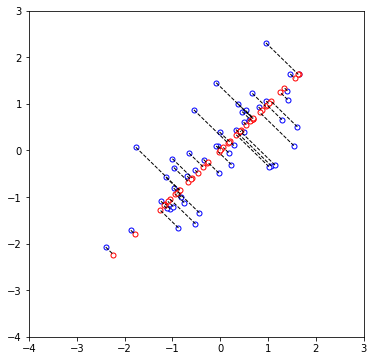

In [10]:
#  =================== Part 3: Dimension Reduction ===================
print('Dimension reduction on example dataset.')

#  Plot the normalized dataset (returned from pca)
plt.figure(figsize=(6,6))
plt.plot(X_norm[:,0], X_norm[:,1], 'bo', mfc='w', ms=5)
plt.axis([-4, 3, -4, 3])

#  Project the data onto K = 1 dimension
K = 1
Z = project_data(X_norm, U, K)
print('\nProjection of the first example: %f' %Z[0])
print('(this value should be about 1.481274)')

X_rec  = recover_data(Z, U, K)
print('\nApproximation of the first example: %f %f' %tuple(X_rec[0,:]))
print('(this value should be about  -1.047419 -1.047419)')

# Draw lines connecting the projected points to the original points
plt.plot(X_rec[:,0], X_rec[:,1], 'ro', mfc='w', ms=5)
for i in range(len(X_norm)):
    plt.plot([X_norm[i,0], X_rec[i,0]], [X_norm[i,1], X_rec[i,1]],'--', c='k', lw=1)
plt.show()

### 2.4 Face Image Dataset
In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset `ex7faces.mat` contains a dataset $X$ of face images, each $32 \times 32$ in grayscale. Each row of $X$ corresponds to one face image (a row vector of length $1024$). The next step will load and visualize the first $100$ of these face images

Loading face dataset.


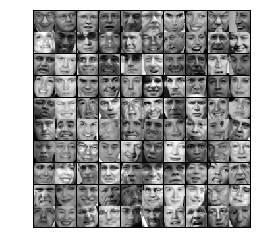

In [11]:
#  =============== Part 4: Loading and Visualizing Face Data =============
print('Loading face dataset.')

# Load Face dataset
data = io.loadmat('ex7_data/ex7faces.mat')
X = data['X']

# Display the first 100 faces in the dataset
img = display_data(X[0:100, :])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

#### 2.4.1 PCA on Faces
To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix $X$. The script will do this for you and then run your PCA code. After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in $U$ (each row) is a vector of length $n$ (where for the face dataset, $n = 1024$). It turns out that we can visualize these principal components by reshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset. The next script displays the first $36$ principal components that describe the largest variations. If you want, you can also change the code to display more principal components to see how they capture more and more details.


Running PCA on face dataset.



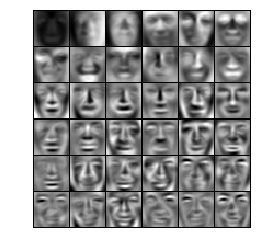

In [12]:
# =========== Part 5: PCA on Face Data: Eigenfaces  ===================
# Run PCA and visualize the eigenvectors which are in this case eigenfaces
# We display the first 36 eigenfaces.
print('\nRunning PCA on face dataset.\n')
X_norm, mu, sigma = feature_normalize(X) # Nomorlize X

# Run PCA
U, S = pca(X_norm)

# Visualize the top 36 eigenvectors found
img = display_data(U[:, :36].T)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

#### 2.4.2 Dimensionality Reduction
Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., $100$ dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.
The next part will project the face dataset onto only the first $100$ principal components. Concretely, each face image is now described by a vector $z^{(i)} \in \mathbb{R}^{100}$ .

To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset. In <b>pca</b> function, an approximate recovery of the data is performed and the original and projected face images are displayed side by side. From the reconstruction, you can observe that the general structure and appearance of the face are kept while
the fine details are lost. This is a remarkable reduction (more than 10$\times$) in the dataset size that can help speed up your learning algorithm significantly. For example, if you were training a neural network to perform person recognition (gven a face image, predict the identitfy of the person), you can use the dimension reduced input of only a $100$ dimensions instead of the original pixels.

In [13]:
# ============= Part 6: Dimension Reduction for Faces =================
# Project images to the eigen space using the top k eigenvectors 
print('Dimension reduction for face dataset.')

K = 100
Z = project_data(X_norm, U, K)
print('The projected data Z has a size of: ', Z.shape)

Dimension reduction for face dataset.
The projected data Z has a size of:  (5000, 100)


Visualizing the projected (reduced dimension) faces.


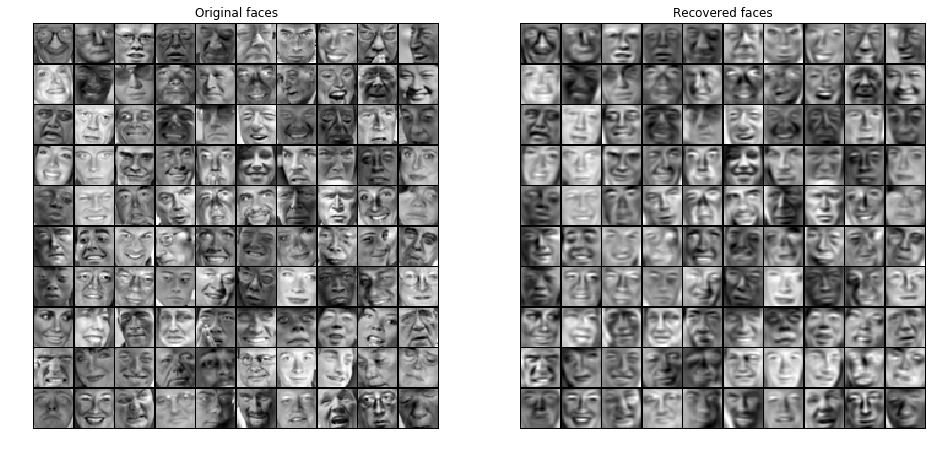

In [14]:
# ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
# Project images to the eigen space using the top K eigen vectors and 
# visualize only using those K dimensions

print('Visualizing the projected (reduced dimension) faces.')
K = 100
X_rec  = recover_data(Z, U, K)

fig=plt.figure(figsize=(16, 16))

# Display normalized data
fig.add_subplot(1, 2, 1)
plt.imshow(display_data(X_norm[:100,:]), cmap='gray')
plt.title('Original faces')
plt.axis('off')

# Display reconstructed data from only k eigenfaces
fig.add_subplot(1, 2, 2)
plt.imshow(display_data(X_rec[:100,:]), cmap='gray')
plt.title('Recovered faces')
plt.axis('off')
plt.show()